<a href="https://colab.research.google.com/github/juanrodriguezmicros2/Sistemas-Embebidos-I/blob/main/IR_ControlNumero7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Taller Sensor Infrarojo IR 1838 con Control Remoto**
## *Hosman Javier Nieto Cruz       - 20212005117*
## *Juan Camilo Rodriguez Garcia   - 20202005070*




# Decoding an IR Digital Signal


The objective of this practice is to determine the button that was pressed on an IR remote control.

You must respond to the

>**StWo 'name'**

(Student Work) items. Please preserve the name of each StWo

There are also challenges, the respective percentages will be given in class


## Electronic Components Assembly
1. Connect the Raspberry Pico (W) to the computer using a micro USB cable.
2. Connect a LED with its resistor to GP0.
3. Connect an IR sensor as follows:

| IR Sensor | Raspberry Pico |
|-----------|----------------|
| Vout      | GP17           |
| GND       | GND            |
| Vcc       | 3V3            |

>StWo Circuit: Take a picture of the circuit whit your classmates'names

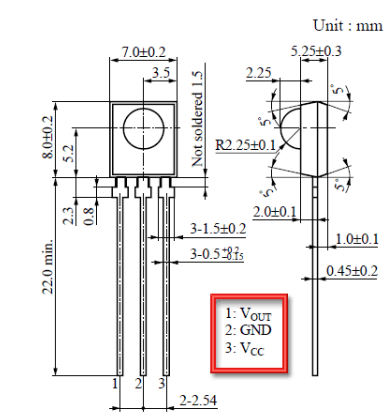


## Background

The output of the IR sensor TSSP4038 (Vcc) goes high when it receives an infrared light blinking at 38 kHz.

In an IR remote control, logic zero and logic one are represented by varying blinking durations, with the specific timings depending on the remote control model. Each key on the remote control is associated with a unique combination of logic ones and logic zeros. The goal is to decipher the representation of each digit using the specific remote control's blinking patterns.


>StWo Signal: Draw a possible signal that sends 0110

## Code in MicroPython for Raspberry Pico (W)

The following code displays the timing of the blinking intervals and the time between two consecutive blinks.
```python
import time
import rp2
from machine import Pin

@rp2.asm_pio(set_init=rp2.PIO.OUT_LOW)
def blink():
    label('inicio')
    mov(x,invert(null))
    jmp(pin,'uno')
    label('cero')
    set(pins, 0)
    jmp(x_dec,'cero_bis')
    jmp('fin')
    label('cero_bis')
    jmp(pin,'fin')
    jmp('cero')
    label('uno')
    set(pins, 1)
    jmp(x_dec,'uno_bis')
    jmp('fin')
    label('uno_bis')
    nop()
    jmp(pin,'uno')
    label('fin')
    mov(isr,x)
    push(noblock)
    jmp('inicio')

   
sm = rp2.StateMachine(
    0,
    blink,
    freq=38000*100,
    set_base=Pin(0),
    jmp_pin= Pin(17, Pin.IN, Pin.PULL_UP)
)

sm.active(1)
while True:
    dat=sm.get()
    print(2**32-dat,end=', ')

```

>StWo Diagram: Draw the flow diagram of the blink function

# **Se planteó el siguiente diagrama de flujo que refleja el comportamito de las series de instrucciones en lenguaje ensamblador del microcontrolador**
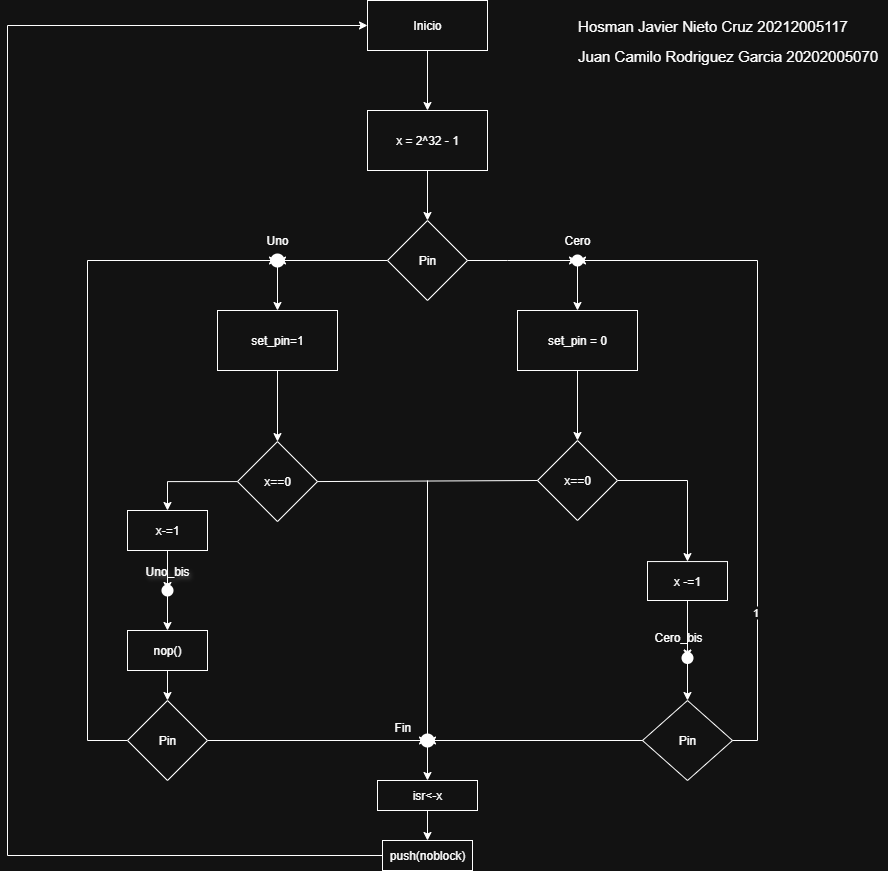

Se realiza el montaje como se muestra en la imagen anterior con el siguiente montaje
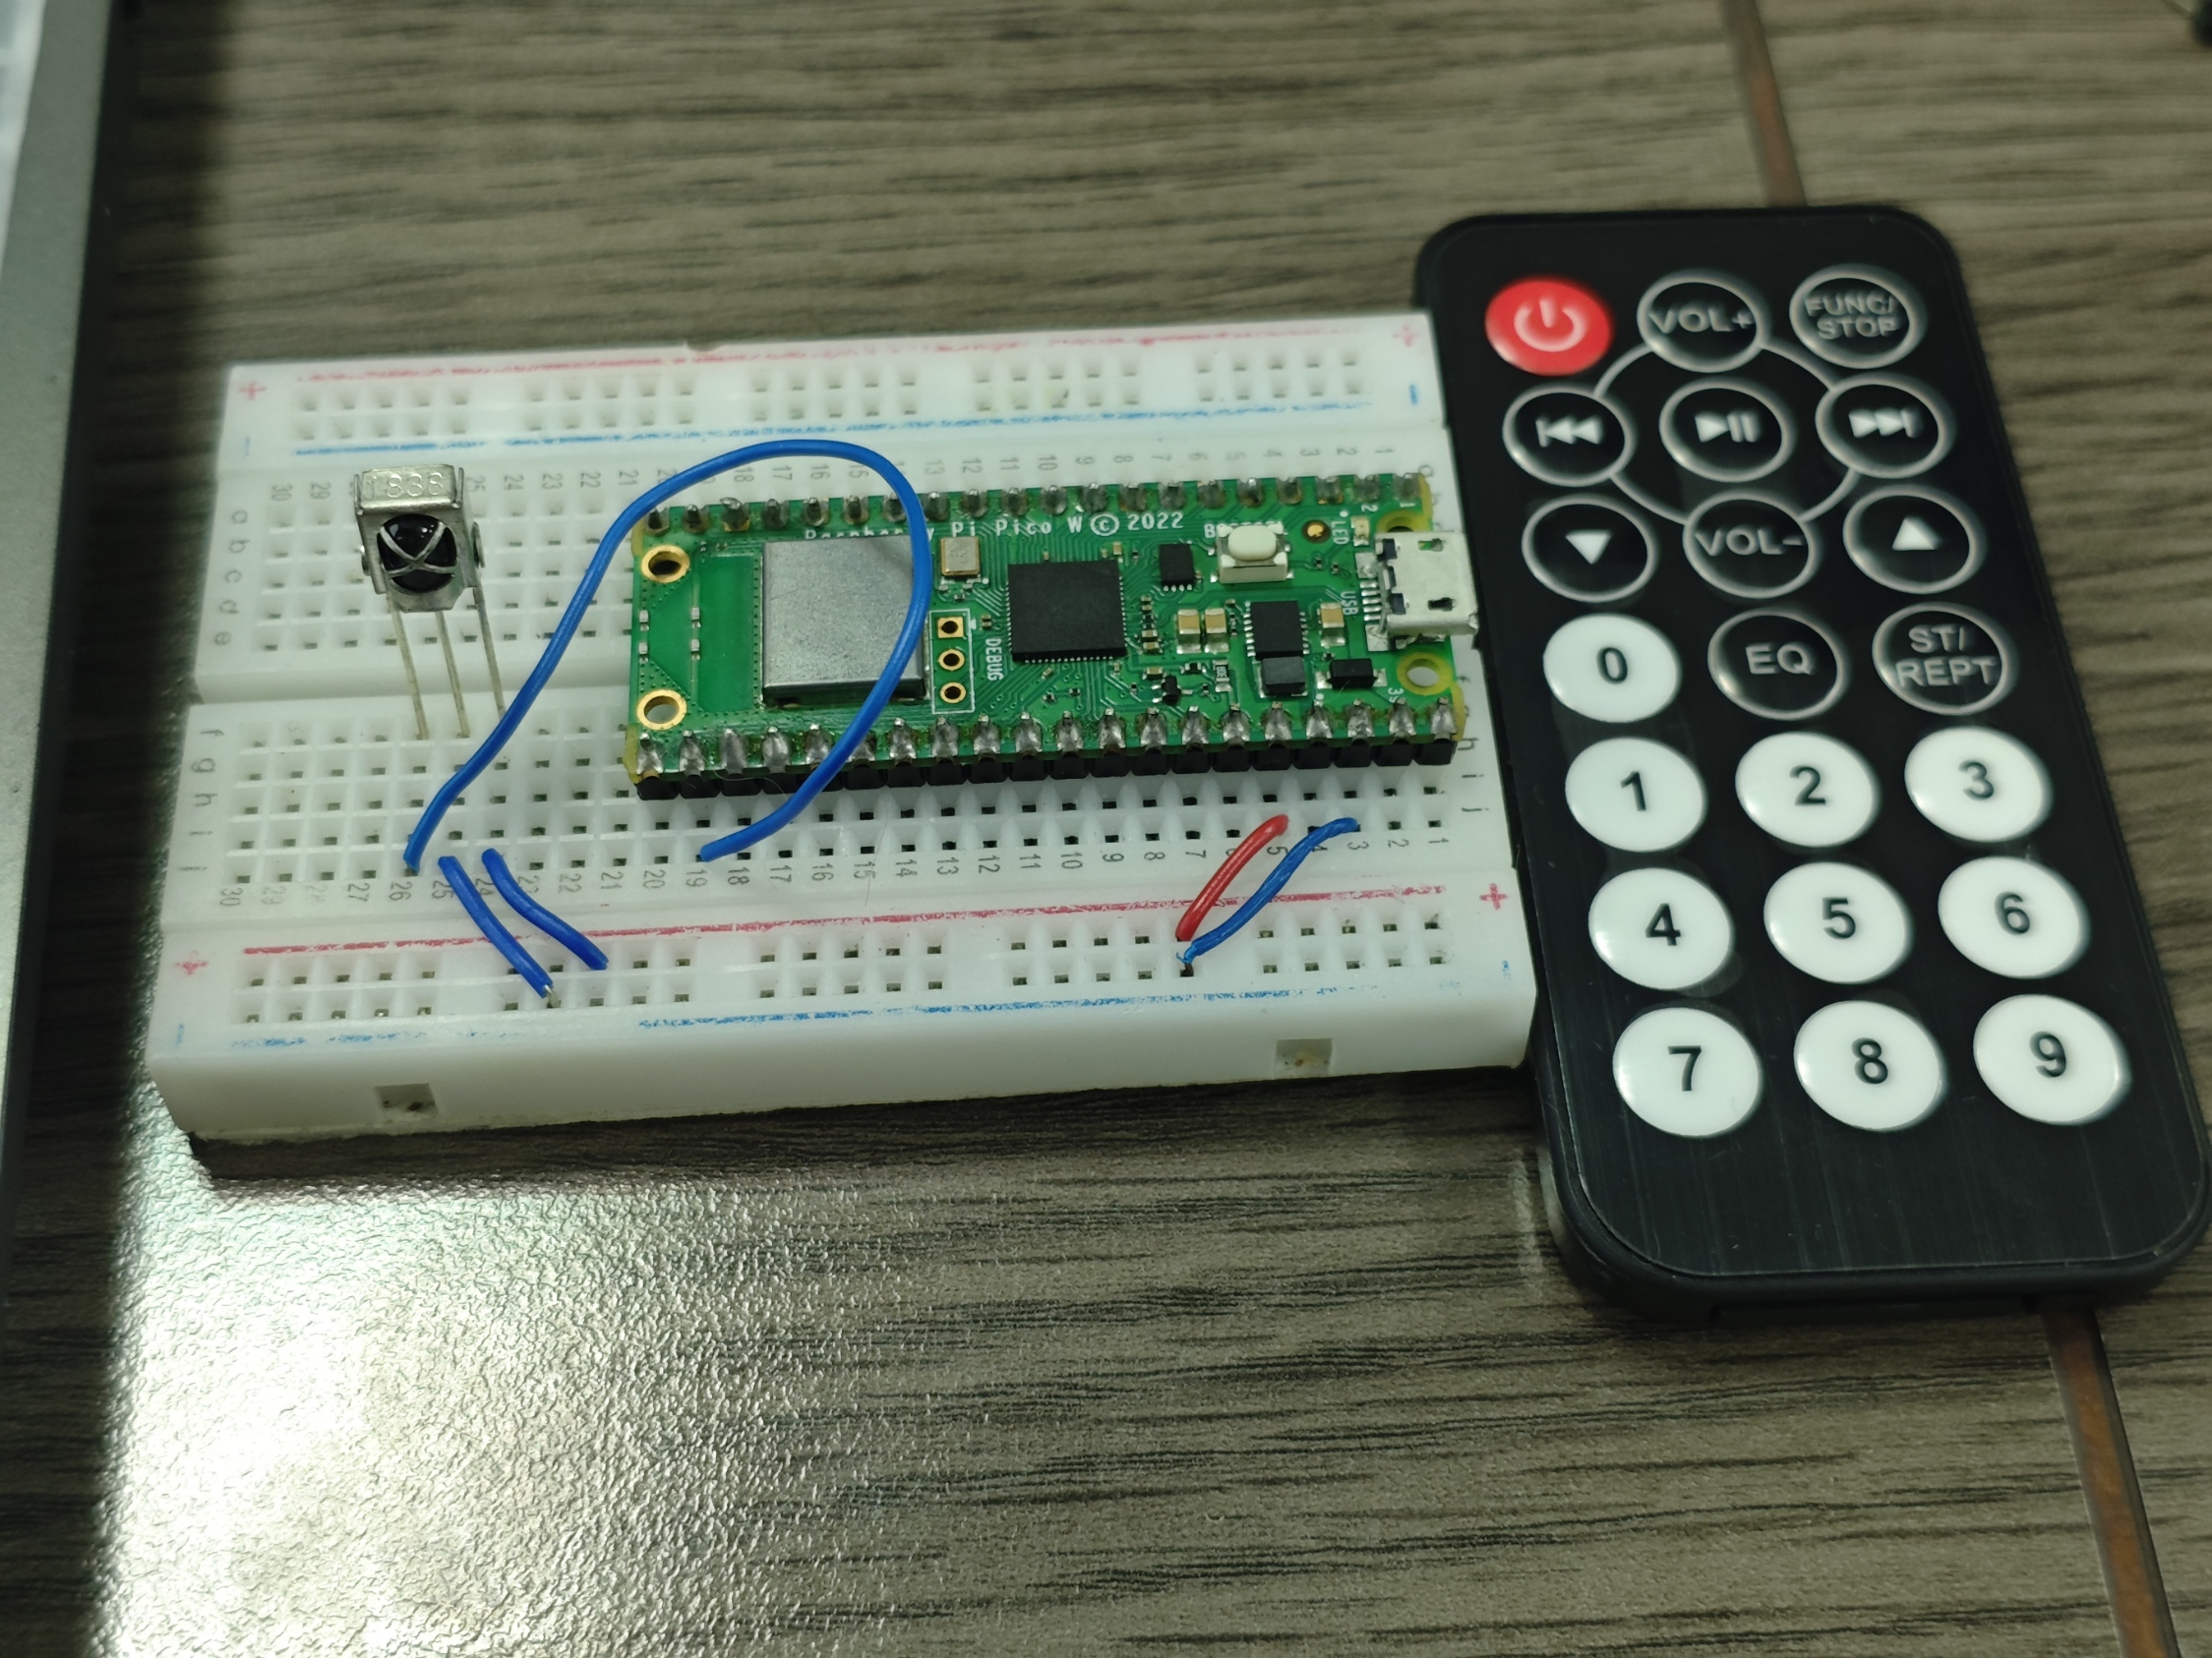



# **Paso 1**
# **Ejercicio con el Numero 7 del Control Remoto**
Con el codigo proporcionado es implementado en nuestra Raberry Pi Pico W y explaya una secuencia de valores que representan el numero 7 del control remoto
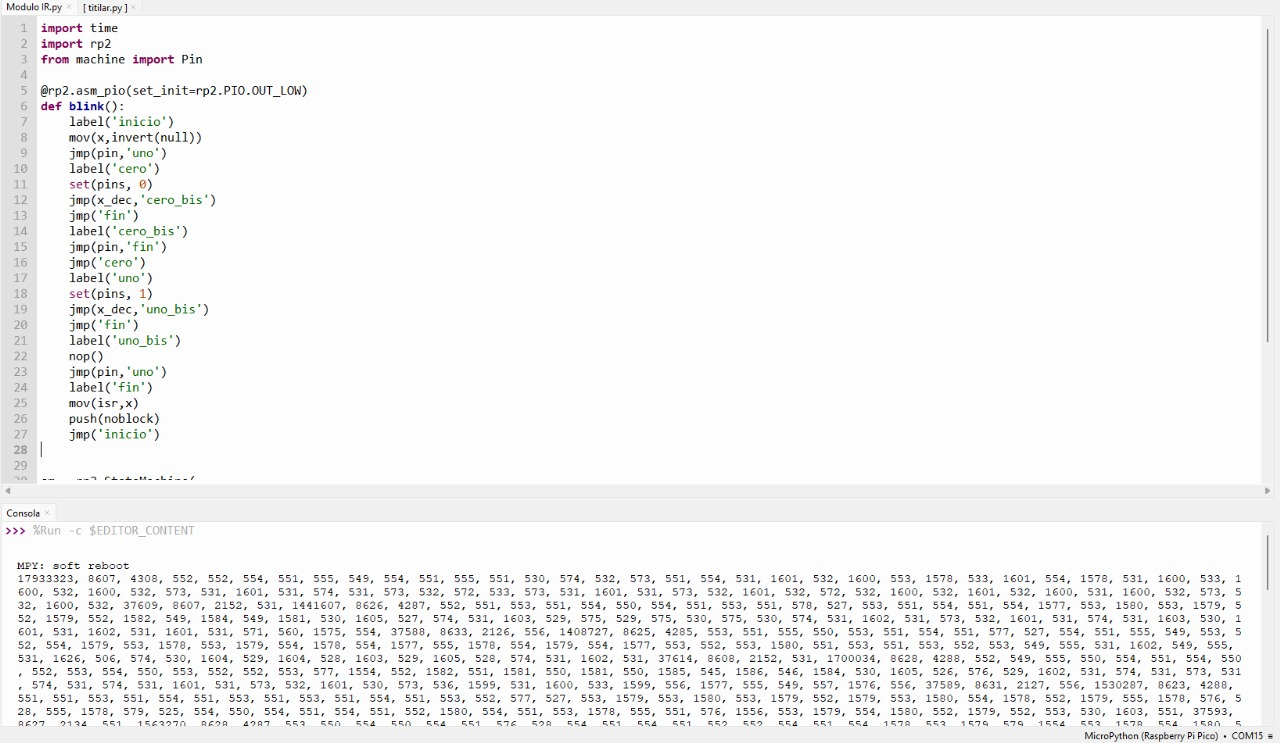

## Example Scenario

When the '0' key is pressed, the following sequence is displayed:



```
896431, 9244, 4221, 647, 468, 643, 471, 649, 466, 642, 469, 646, 468, 644, 471,
 644, 469, 645, 469, 647, 1518, 645, 1520, 642, 1522, 640, 1527, 619, 1547,
  638, 1528, 641, 1520, 644, 1524, 620, 496, 645, 1522, 642, 1523, 642, 472,
  618, 1548, 641, 474, 619, 497, 618, 497, 644, 1522, 641, 473, 644, 471, 640,
  1525, 642, 470, 640, 1525, 642, 1522, 645, 1519, 643, 37904, 9218, 2069, 644,

```
>StWo Pattern1: Write a pattern that you infer with a brief observations

Se obtuvo la siguiente secuencia de numeros que muestran el comportamiento del sensor con el Numero 7 del control remoto
```
17933323, 8607, 4308, 552, 552, 554, 551, 555, 549, 554, 551, 555, 551, 530,
574, 532, 573, 551, 554, 531, 1601, 532, 1600, 553, 1578, 533, 1601, 554, 1578,
531, 1600, 533, 1600, 532, 1600, 532, 573, 531, 1601, 531, 574, 531, 573, 532,
572, 533, 573, 531, 1601, 531, 573, 532, 1601, 532, 572, 532, 1600, 532,
1601, 532, 1600, 531, 1600, 532, 573, 532, 1600, 532, 37609, 8607, 2152, 531
```
Se observa un patron que comienza con un valor muy grande y el resto tiende a general valores cercanos entre ellos, mostrando como un principio y fin con los valores grandes.

A continuacion se muestran estos valores graficados de acuerdo a su magnitud y en el orden en que se reciben, exceptuando el primero que es muy grande.

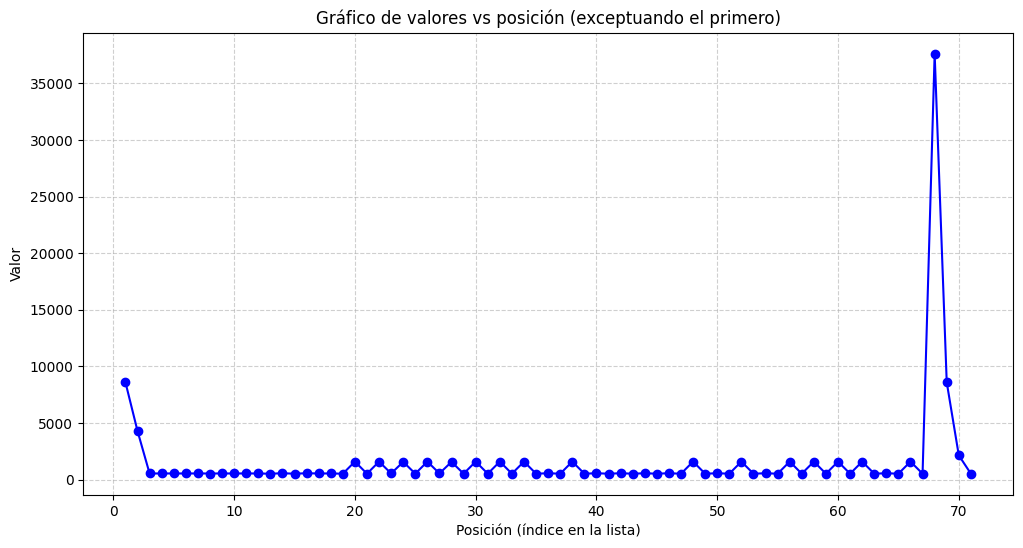

In [ ]:
import matplotlib.pyplot as plt

Presionar_una_vez = [17933323, 8607, 4308, 552, 552, 554, 551, 555, 549, 554, 551, 555, 551, 530, 574, 532, 573, 551, 554, 531, 1601, 532, 1600, 553, 1578, 533, 1601, 554, 1578, 531, 1600, 533, 1600, 532, 1600, 532, 573, 531, 1601, 531, 574, 531, 573, 532, 572, 533, 573, 531, 1601, 531, 573, 532, 1601, 532, 572, 532, 1600, 532, 1601, 532, 1600, 531, 1600, 532, 573, 532, 1600, 532, 37609, 8607, 2152, 531]

valores = Presionar_una_vez[1:]
indices = list(range(1, len(Presionar_una_vez)))  # índices reales

# Graficar
plt.figure(figsize=(12,6))
plt.plot(indices, valores, marker='o', linestyle='-', color='b')
plt.title("Gráfico de valores vs posición (exceptuando el primero)")
plt.xlabel("Posición (índice en la lista)")
plt.ylabel("Valor")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


After pressing the '0' key 10 times, with more than 2-second interval between each press, the following pattern is displayed:

```

1227929, 9331, 4336, 532, 506, 616, 502, 639, 476, 645, 472, 619, 497, 619,
499, 620, 496, 646, 473, 620, 1545, 647, 1517, 621, 1548, 614, 1552, 649, 1517,
645, 1518, 646, 1517, 647, 1515, 640, 473, 643, 1519, 648, 1517, 649, 467, 625,
1545, 648, 466, 649, 468, 654, 459, 652, 1513, 644, 471, 649, 467, 650, 1515,
649, 469, 646, 1522, 649, 1517, 652, 1513, 649, 37859, 9176, 2062, 678, 91167,
9226, 2106, 604, 1928130, 2918, 403, 3087, 837, 1090, 4286, 578, 508, 608, 531,
585, 533, 250, 2266, 287, 702, 316, 753, 502, 560, 555, 1641, 553, 1591, 551,
1613, 581, 1588, 587, 1581, 581, 1565, 607, 1561, 610, 1557, 612, 503, 611,
1554, 612, 1555, 610, 507, 610, 1556, 610, 529, 583, 510, 609, 507, 610, 1558,
609, 510, 612, 504, 611, 1556, 611, 532, 583, 1584, 582, 1586, 580, 1586, 553,
37863, 9314, 2078, 615, 2474576, 9108, 4255, 606, 501, 606, 501, 604, 501, 607,
500, 607, 499, 606, 500, 605, 499, 606, 499, 605, 1553, 605, 1550, 604, 1552,
631, 1523, 601, 1553, 606, 1552, 603, 1551, 629, 1527, 606, 498, 628, 1527,
606, 1547, 608, 498, 603, 1551, 633, 473, 605, 502, 609, 499, 608, 1551, 606,
499, 606, 499, 605, 1550, 607, 497, 608, 1547, 603, 1551, 608, 1546, 608,
37944, 9024, 2100, 631, 2557320, 9275, 4286, 553, 563, 605, 513, 555, 564, 554,
565, 579, 538, 585, 530, 584, 532, 584, 530, 585, 1559, 608, 1557, 608, 1557,
608, 1582, 582, 1584, 578, 1586, 580, 1585, 581, 1584, 582, 533, 582, 1584,
582, 1560, 602, 537, 580, 1584, 610, 506, 582, 509, 608, 532, 583, 1560, 609,
531, 584, 532, 584, 1561, 605, 511, 606, 1582, 582, 1559, 606, 1557, 613,
37920, 9078, 2106, 602, 3068902, 9168, 4262, 604, 509, 600, 508, 602, 530, 578,
508, 602, 530, 581, 507, 603, 507, 601, 507, 629, 1533, 604, 1558, 602, 1561,
601, 1560, 605, 1558, 602, 1554, 605, 1555, 603, 1557, 603, 502, 604, 1556,
602, 1555, 602, 505, 599, 1557, 600, 506, 599, 506, 599, 504, 602, 1556, 600,
507, 598, 506, 603, 1555, 601, 506, 602, 1556, 602, 1559, 600, 1559, 601,
37981, 9026, 2143, 571, 2189940, 9187, 4260, 604, 506, 607, 503, 603, 505, 605,
503, 607, 503, 604, 505, 603, 502, 606, 501, 606, 1555, 607, 1553, 607, 1552,
605, 1554, 605, 1558, 604, 1557, 607, 1556, 603, 1556, 604, 507, 605, 1554,
609, 1555, 608, 503, 605, 1555, 609, 504, 605, 504, 608, 502, 606, 1555, 607,
504, 605, 504, 631, 1532, 608, 504, 605, 1555, 608, 1553, 609, 1552, 608,
37947, 9136, 2075, 610, 2143310, 9140, 4312, 553, 561, 570, 537, 568, 539, 570,
537, 546, 561, 577, 531, 579, 506, 603, 530, 580, 1557, 599, 1556, 601, 1557,
600, 1557, 601, 1555, 602, 1559, 599, 1557, 602, 1552, 602, 505, 602, 1554,
599, 1556, 600, 504, 600, 1557, 600, 502, 602, 501, 600, 503, 599, 1556, 601,
502, 603, 502, 598, 1557, 599, 505, 599, 1555, 599, 1556, 602, 1555, 602,
37958, 9052, 2106, 604, 2064092, 9128, 4257, 605, 506, 605, 504, 604, 503, 604,
502, 604, 504, 602, 503, 603, 505, 606, 499, 601, 1555, 604, 1553, 605, 1553,
603, 1552, 606, 1552, 602, 1777, 392, 1556, 598, 1558, 598, 506, 599, 1557,
595, 1579, 519, 590, 573, 1589, 575, 539, 551, 563, 548, 565, 548, 1615, 547,
539, 602, 508, 605, 1556, 607, 504, 606, 1557, 600, 1554, 626, 1529, 601,
37947, 8970, 2101, 631, 2465084, 9060, 4260, 603, 505, 602, 503, 599, 505, 602,
503, 599, 504, 628, 477, 601, 503, 605, 502, 599, 1556, 603, 1554, 601, 1555,
602, 1551, 602, 1553, 603, 1555, 604, 1554, 603, 1554, 601, 502, 603, 1553,
604, 1552, 604, 502, 603, 1555, 603, 502, 602, 502, 603, 502, 624, 1531, 626,
477, 602, 500, 604, 1552, 600, 503, 603, 1550, 604, 1552, 605, 1551, 603,
37955, 9046, 2073, 606, 2395319, 9063, 4345, 518, 563, 550, 589, 524, 562, 544,
563, 572, 539, 548, 587, 520, 560, 567, 539, 570, 1589, 569, 1590, 568, 1593,
521, 1692, 442, 1665, 541, 1614, 569, 1591, 564, 1591, 564, 537, 548, 1613,
547, 1612, 546, 588, 542, 1591, 572, 537, 545, 564, 569, 538, 546, 1641, 520,
588, 519, 564, 546, 1615, 544, 589, 522, 1615, 547, 1615, 568, 1615, 522,
38012, 9052, 2143, 544, 2458182, 8921, 4318, 540, 561, 564, 538, 540, 560, 564,
537, 563, 537, 564, 536, 539, 561, 541, 561, 563, 1590, 541, 1612, 541, 1613,
565, 1589, 564, 1589, 566, 1564, 565, 1614, 564, 1590, 565, 535, 543, 1588,
591, 1561, 566, 539, 586, 1590, 566, 535, 566, 535, 567, 535, 566, 1564, 590,
536, 564, 537, 565, 1590, 563, 538, 566, 1589, 541, 1611, 568, 1587, 565,
37982, 8972, 2137, 567, 1622321, 9030, 4289, 567, 535, 567, 536, 542, 560, 565,
534, 542, 535, 590, 512, 566, 558, 567, 535, 542, 1613, 566, 1590, 542, 1614,
568, 1590, 569, 1615, 542, 1590, 570, 1587, 544, 1614, 544, 561, 542, 1613,
566, 1588, 544, 559, 566, 1587, 567, 535, 545, 559, 543, 562, 543, 1614, 543,
561, 567, 538, 543, 1614, 543, 562, 565, 1591, 567, 1589, 569, 1565, 590,
37959, 9050, 2138, 545,

```

>StWo Pattern2: Does your pattern is still valid?


# **Paso 2**
# **Ejercicio con el Numero 7 del Control Remoto**
Se realiza la optencion de 10 emisiones del numero 7 del control remoto y estos son los siguientes datos obtenidos:
```
#Siete

17933323, 8607, 4308, 552, 552, 554, 551, 555, 549, 554, 551, 555, 551, 530,
574, 532, 573, 551, 554, 531, 1601, 532, 1600, 553, 1578, 533, 1601, 554, 1578,
531, 1600, 533, 1600, 532, 1600, 532, 573, 531, 1601, 531, 574, 531, 573, 532,
572, 533, 573, 531, 1601, 531, 573, 532, 1601, 532, 572, 532, 1600, 532, 1601,
532, 1600, 531, 1600, 532, 573, 532, 1600, 532, 37609, 8607, 2152, 531,
1441607, 8626, 4287, 552, 551, 553, 551, 554, 550, 554, 551, 553, 551, 578,
527, 553, 551, 554, 551, 554, 1577, 553, 1580, 553, 1579, 552, 1579, 552, 1582,
549, 1584, 549, 1581, 530, 1605, 527, 574, 531, 1603, 529, 575, 529, 575, 530,
575, 530, 574, 531, 1602, 531, 573, 532, 1601, 531, 574, 531, 1603, 530, 1601,
531, 1602, 531, 1601, 531, 571, 560, 1575, 554, 37588, 8633, 2126, 556,
1408727, 8625, 4285, 553, 551, 555, 550, 553, 551, 554, 551, 577, 527, 554,
551, 555, 549, 553, 552, 554, 1579, 553, 1578, 553, 1579, 554, 1578, 554, 1577,
555, 1578, 554, 1579, 554, 1577, 553, 552, 553, 1580, 551, 553, 551, 553, 552,
553, 549, 555, 531, 1602, 549, 555, 531, 1626, 506, 574, 530, 1604, 529, 1604,
528, 1603, 529, 1605, 528, 574, 531, 1602, 531, 37614, 8608, 2152, 531,
1700034, 8628, 4288, 552, 549, 555, 550, 554, 551, 554, 550, 552, 553, 554,
550, 553, 552, 552, 553, 577, 1554, 552, 1582, 551, 1581, 550, 1581, 550, 1585,
545, 1586, 546, 1584, 530, 1605, 526, 576, 529, 1602, 531, 574, 531, 573, 531,
574, 531, 574, 531, 1601, 531, 573, 532, 1601, 530, 573, 536, 1599, 531, 1600,
533, 1599, 556, 1577, 555, 549, 557, 1576, 556, 37589, 8631, 2127, 556,
1530287, 8623, 4288, 551, 551, 553, 551, 554, 551, 553, 551, 553, 551, 554,
551, 553, 552, 577, 527, 553, 1579, 553, 1580, 553, 1579, 552, 1579, 553, 1580,
554, 1578, 552, 1579, 555, 1578, 576, 528, 555, 1578, 579, 525, 554, 550, 554,
551, 554, 551, 552, 1580, 554, 551, 553, 1578, 555, 551, 576, 1556, 553, 1579,
554, 1580, 552, 1579, 552, 553, 530, 1603, 551, 37593, 8627, 2134, 551,
1563270, 8628, 4287, 553, 550, 554, 550, 554, 551, 576, 528, 554, 551, 554,
551, 552, 552, 554, 551, 554, 1578, 553, 1579, 579, 1554, 553, 1578, 554, 1580,
553, 1579, 552, 1579, 554, 1579, 553, 551, 552, 1579, 554, 552, 554, 550, 553,
552, 579, 526, 553, 1578, 554, 552, 553, 1579, 552, 553, 552, 1579, 554, 1578,
552, 1581, 554, 1579, 553, 551, 552, 1582, 551, 37593, 8606, 2153, 531,
1602169, 8624, 4286, 553, 551, 554, 551, 553, 551, 553, 551, 554, 551, 553,
551, 554, 551, 553, 551, 554, 1579, 578, 1554, 553, 1579, 553, 1580, 553, 1578,
553, 1578, 555, 1579, 553, 1578, 553, 552, 553, 1579, 554, 551, 554, 550, 554,
550, 554, 551, 554, 1580, 552, 551, 552, 1581, 553, 551, 553, 1579, 554, 1580,
577, 1554, 553, 1579, 553, 552, 554, 1578, 553, 37594, 8625, 2132, 552,
1591603, 8625, 4287, 551, 552, 553, 551, 579, 526, 553, 551, 554, 550, 554,
551, 553, 551, 554, 550, 553, 1579, 553, 1580, 552, 1580, 551, 1580, 530, 1604,
528, 1604, 528, 1603, 529, 1605, 527, 575, 530, 1604, 528, 575, 530, 573, 532,
573, 532, 573, 530, 1602, 532, 573, 532, 1600, 532, 572, 535, 1599, 531, 1600,
533, 1600, 555, 1577, 557, 545, 562, 1572, 559, 37585, 8634, 2125, 558,
1500598, 8624, 4286, 552, 552, 553, 551, 553, 551, 554, 550, 554, 551, 553,
551, 577, 528, 553, 551, 553, 1580, 552, 1578, 554, 1580, 552, 1579, 553, 1578,
554, 1579, 554, 1578, 553, 1578, 554, 551, 554, 1579, 552, 552, 552, 552, 553,
552, 551, 554, 550, 1582, 550, 554, 530, 1604, 528, 575, 530, 1603, 529, 1605,
528, 1603, 529, 1604, 528, 574, 531, 1602, 531, 37616, 8605, 2153, 530,
1527016, 8623, 4285, 553, 552, 553, 551, 553, 551, 553, 551, 553, 552, 553,
551, 553, 551, 554, 551, 553, 1580, 553, 1577, 554, 1578, 555, 1579, 577, 1554,
554, 1577, 555, 1579, 577, 1554, 554, 550, 554, 1579, 553, 552, 552, 551, 555,
550, 553, 552, 554, 1578, 553, 551, 554, 1579, 554, 550, 554, 1579, 552, 1580,
553, 1579, 552, 1579, 550, 555, 553, 1580, 552, 37593, 8603, 2156, 548
```

Y se confirma la hipotesis planteada frente al patron que siguen estos pulsos enviados por el control remoto, generando cadenas de valores que comienzan con un numero muy grande.

## Data Analysis for Pattern Discovery

The next step involves analyzing the data to uncover the underlying pattern. To begin, a variable `input_data` is defined.

In [ ]:
input_data = [1227929, 9331, 4336, 532, 506, 616, 502, 639, 476, 645, 472, 619, 497, 619, 499, 620, 496, 646, 473, 620, 1545, 647, 1517, 621, 1548, 614, 1552, 649, 1517, 645, 1518, 646, 1517, 647, 1515, 640, 473, 643, 1519, 648, 1517, 649, 467, 625, 1545, 648, 466, 649, 468, 654, 459, 652, 1513, 644, 471, 649, 467, 650, 1515, 649, 469, 646, 1522, 649, 1517, 652, 1513, 649, 37859, 9176, 2062, 678, 91167, 9226, 2106, 604, 1928130, 2918, 403, 3087, 837, 1090, 4286, 578, 508, 608, 531, 585, 533, 250, 2266, 287, 702, 316, 753, 502, 560, 555, 1641, 553, 1591, 551, 1613, 581, 1588, 587, 1581, 581, 1565, 607, 1561, 610, 1557, 612, 503, 611, 1554, 612, 1555, 610, 507, 610, 1556, 610, 529, 583, 510, 609, 507, 610, 1558, 609, 510, 612, 504, 611, 1556, 611, 532, 583, 1584, 582, 1586, 580, 1586, 553, 37863, 9314, 2078, 615, 2474576, 9108, 4255, 606, 501, 606, 501, 604, 501, 607, 500, 607, 499, 606, 500, 605, 499, 606, 499, 605, 1553, 605, 1550, 604, 1552, 631, 1523, 601, 1553, 606, 1552, 603, 1551, 629, 1527, 606, 498, 628, 1527, 606, 1547, 608, 498, 603, 1551, 633, 473, 605, 502, 609, 499, 608, 1551, 606, 499, 606, 499, 605, 1550, 607, 497, 608, 1547, 603, 1551, 608, 1546, 608, 37944, 9024, 2100, 631, 2557320, 9275, 4286, 553, 563, 605, 513, 555, 564, 554, 565, 579, 538, 585, 530, 584, 532, 584, 530, 585, 1559, 608, 1557, 608, 1557, 608, 1582, 582, 1584, 578, 1586, 580, 1585, 581, 1584, 582, 533, 582, 1584, 582, 1560, 602, 537, 580, 1584, 610, 506, 582, 509, 608, 532, 583, 1560, 609, 531, 584, 532, 584, 1561, 605, 511, 606, 1582, 582, 1559, 606, 1557, 613, 37920, 9078, 2106, 602, 3068902, 9168, 4262, 604, 509, 600, 508, 602, 530, 578, 508, 602, 530, 581, 507, 603, 507, 601, 507, 629, 1533, 604, 1558, 602, 1561, 601, 1560, 605, 1558, 602, 1554, 605, 1555, 603, 1557, 603, 502, 604, 1556, 602, 1555, 602, 505, 599, 1557, 600, 506, 599, 506, 599, 504, 602, 1556, 600, 507, 598, 506, 603, 1555, 601, 506, 602, 1556, 602, 1559, 600, 1559, 601, 37981, 9026, 2143, 571, 2189940, 9187, 4260, 604, 506, 607, 503, 603, 505, 605, 503, 607, 503, 604, 505, 603, 502, 606, 501, 606, 1555, 607, 1553, 607, 1552, 605, 1554, 605, 1558, 604, 1557, 607, 1556, 603, 1556, 604, 507, 605, 1554, 609, 1555, 608, 503, 605, 1555, 609, 504, 605, 504, 608, 502, 606, 1555, 607, 504, 605, 504, 631, 1532, 608, 504, 605, 1555, 608, 1553, 609, 1552, 608, 37947, 9136, 2075, 610, 2143310, 9140, 4312, 553, 561, 570, 537, 568, 539, 570, 537, 546, 561, 577, 531, 579, 506, 603, 530, 580, 1557, 599, 1556, 601, 1557, 600, 1557, 601, 1555, 602, 1559, 599, 1557, 602, 1552, 602, 505, 602, 1554, 599, 1556, 600, 504, 600, 1557, 600, 502, 602, 501, 600, 503, 599, 1556, 601, 502, 603, 502, 598, 1557, 599, 505, 599, 1555, 599, 1556, 602, 1555, 602, 37958, 9052, 2106, 604, 2064092, 9128, 4257, 605, 506, 605, 504, 604, 503, 604, 502, 604, 504, 602, 503, 603, 505, 606, 499, 601, 1555, 604, 1553, 605, 1553, 603, 1552, 606, 1552, 602, 1777, 392, 1556, 598, 1558, 598, 506, 599, 1557, 595, 1579, 519, 590, 573, 1589, 575, 539, 551, 563, 548, 565, 548, 1615, 547, 539, 602, 508, 605, 1556, 607, 504, 606, 1557, 600, 1554, 626, 1529, 601, 37947, 8970, 2101, 631, 2465084, 9060, 4260, 603, 505, 602, 503, 599, 505, 602, 503, 599, 504, 628, 477, 601, 503, 605, 502, 599, 1556, 603, 1554, 601, 1555, 602, 1551, 602, 1553, 603, 1555, 604, 1554, 603, 1554, 601, 502, 603, 1553, 604, 1552, 604, 502, 603, 1555, 603, 502, 602, 502, 603, 502, 624, 1531, 626, 477, 602, 500, 604, 1552, 600, 503, 603, 1550, 604, 1552, 605, 1551, 603, 37955, 9046, 2073, 606, 2395319, 9063, 4345, 518, 563, 550, 589, 524, 562, 544, 563, 572, 539, 548, 587, 520, 560, 567, 539, 570, 1589, 569, 1590, 568, 1593, 521, 1692, 442, 1665, 541, 1614, 569, 1591, 564, 1591, 564, 537, 548, 1613, 547, 1612, 546, 588, 542, 1591, 572, 537, 545, 564, 569, 538, 546, 1641, 520, 588, 519, 564, 546, 1615, 544, 589, 522, 1615, 547, 1615, 568, 1615, 522, 38012, 9052, 2143, 544, 2458182, 8921, 4318, 540, 561, 564, 538, 540, 560, 564, 537, 563, 537, 564, 536, 539, 561, 541, 561, 563, 1590, 541, 1612, 541, 1613, 565, 1589, 564, 1589, 566, 1564, 565, 1614, 564, 1590, 565, 535, 543, 1588, 591, 1561, 566, 539, 586, 1590, 566, 535, 566, 535, 567, 535, 566, 1564, 590, 536, 564, 537, 565, 1590, 563, 538, 566, 1589, 541, 1611, 568, 1587, 565, 37982, 8972, 2137, 567, 1622321, 9030, 4289, 567, 535, 567, 536, 542, 560, 565, 534, 542, 535, 590, 512, 566, 558, 567, 535, 542, 1613, 566, 1590, 542, 1614, 568, 1590, 569, 1615, 542, 1590, 570, 1587, 544, 1614, 544, 561, 542, 1613, 566, 1588, 544, 559, 566, 1587, 567, 535, 545, 559, 543, 562, 543, 1614, 543, 561, 567, 538, 543, 1614, 543, 562, 565, 1591, 567, 1589, 569, 1565, 590, 37959, 9050, 2138, 545,]

# **Paso 3**
# **Ejercicio con el Numero 7 del Control Remoto**
De esta manera tras repetir 10 veces el proceso de emision se recolectaron los datos y se almacenaron en una lista

In [ ]:
#Siete

Input_data=[17933323, 8607, 4308, 552, 552, 554, 551, 555, 549, 554, 551, 555, 551, 530, 574, 532, 573, 551, 554, 531, 1601, 532, 1600, 553, 1578, 533, 1601, 554, 1578, 531, 1600, 533, 1600, 532, 1600, 532, 573, 531, 1601, 531, 574, 531, 573, 532, 572, 533, 573, 531, 1601, 531, 573, 532, 1601, 532, 572, 532, 1600, 532, 1601, 532, 1600, 531, 1600, 532, 573, 532, 1600, 532, 37609, 8607, 2152, 531, 1441607, 8626, 4287, 552, 551, 553, 551, 554, 550, 554, 551, 553, 551, 578, 527, 553, 551, 554, 551, 554, 1577, 553, 1580, 553, 1579, 552, 1579, 552, 1582, 549, 1584, 549, 1581, 530, 1605, 527, 574, 531, 1603, 529, 575, 529, 575, 530, 575, 530, 574, 531, 1602, 531, 573, 532, 1601, 531, 574, 531, 1603, 530, 1601, 531, 1602, 531, 1601, 531, 571, 560, 1575, 554, 37588, 8633, 2126, 556, 1408727, 8625, 4285, 553, 551, 555, 550, 553, 551, 554, 551, 577, 527, 554, 551, 555, 549, 553, 552, 554, 1579, 553, 1578, 553, 1579, 554, 1578, 554, 1577, 555, 1578, 554, 1579, 554, 1577, 553, 552, 553, 1580, 551, 553, 551, 553, 552, 553, 549, 555, 531, 1602, 549, 555, 531, 1626, 506, 574, 530, 1604, 529, 1604, 528, 1603, 529, 1605, 528, 574, 531, 1602, 531, 37614, 8608, 2152, 531, 1700034, 8628, 4288, 552, 549, 555, 550, 554, 551, 554, 550, 552, 553, 554, 550, 553, 552, 552, 553, 577, 1554, 552, 1582, 551, 1581, 550, 1581, 550, 1585, 545, 1586, 546, 1584, 530, 1605, 526, 576, 529, 1602, 531, 574, 531, 573, 531, 574, 531, 574, 531, 1601, 531, 573, 532, 1601, 530, 573, 536, 1599, 531, 1600, 533, 1599, 556, 1577, 555, 549, 557, 1576, 556, 37589, 8631, 2127, 556, 1530287, 8623, 4288, 551, 551, 553, 551, 554, 551, 553, 551, 553, 551, 554, 551, 553, 552, 577, 527, 553, 1579, 553, 1580, 553, 1579, 552, 1579, 553, 1580, 554, 1578, 552, 1579, 555, 1578, 576, 528, 555, 1578, 579, 525, 554, 550, 554, 551, 554, 551, 552, 1580, 554, 551, 553, 1578, 555, 551, 576, 1556, 553, 1579, 554, 1580, 552, 1579, 552, 553, 530, 1603, 551, 37593, 8627, 2134, 551, 1563270, 8628, 4287, 553, 550, 554, 550, 554, 551, 576, 528, 554, 551, 554, 551, 552, 552, 554, 551, 554, 1578, 553, 1579, 579, 1554, 553, 1578, 554, 1580, 553, 1579, 552, 1579, 554, 1579, 553, 551, 552, 1579, 554, 552, 554, 550, 553, 552, 579, 526, 553, 1578, 554, 552, 553, 1579, 552, 553, 552, 1579, 554, 1578, 552, 1581, 554, 1579, 553, 551, 552, 1582, 551, 37593, 8606, 2153, 531, 1602169, 8624, 4286, 553, 551, 554, 551, 553, 551, 553, 551, 554, 551, 553, 551, 554, 551, 553, 551, 554, 1579, 578, 1554, 553, 1579, 553, 1580, 553, 1578, 553, 1578, 555, 1579, 553, 1578, 553, 552, 553, 1579, 554, 551, 554, 550, 554, 550, 554, 551, 554, 1580, 552, 551, 552, 1581, 553, 551, 553, 1579, 554, 1580, 577, 1554, 553, 1579, 553, 552, 554, 1578, 553, 37594, 8625, 2132, 552, 1591603, 8625, 4287, 551, 552, 553, 551, 579, 526, 553, 551, 554, 550, 554, 551, 553, 551, 554, 550, 553, 1579, 553, 1580, 552, 1580, 551, 1580, 530, 1604, 528, 1604, 528, 1603, 529, 1605, 527, 575, 530, 1604, 528, 575, 530, 573, 532, 573, 532, 573, 530, 1602, 532, 573, 532, 1600, 532, 572, 535, 1599, 531, 1600, 533, 1600, 555, 1577, 557, 545, 562, 1572, 559, 37585, 8634, 2125, 558, 1500598, 8624, 4286, 552, 552, 553, 551, 553, 551, 554, 550, 554, 551, 553, 551, 577, 528, 553, 551, 553, 1580, 552, 1578, 554, 1580, 552, 1579, 553, 1578, 554, 1579, 554, 1578, 553, 1578, 554, 551, 554, 1579, 552, 552, 552, 552, 553, 552, 551, 554, 550, 1582, 550, 554, 530, 1604, 528, 575, 530, 1603, 529, 1605, 528, 1603, 529, 1604, 528, 574, 531, 1602, 531, 37616, 8605, 2153, 530, 1527016, 8623, 4285, 553, 552, 553, 551, 553, 551, 553, 551, 553, 552, 553, 551, 553, 551, 554, 551, 553, 1580, 553, 1577, 554, 1578, 555, 1579, 577, 1554, 554, 1577, 555, 1579, 577, 1554, 554, 550, 554, 1579, 553, 552, 552, 551, 555, 550, 553, 552, 554, 1578, 553, 551, 554, 1579, 554, 550, 554, 1579, 552, 1580, 553, 1579, 552, 1579, 550, 555, 553, 1580, 552, 37593, 8603, 2156, 548]


Next, you can segment each key press based on the significant time gap between them. This time gap is notably larger than the intervals within each key's pattern. The question is: **What threshold value can we use to distinguish between individual key presses?**


>StWo dat0: Using the threshold, write a script in Python that separate the list into a list of lists

In [ ]:
dat0=[
[9331, 4336, 532, 506, 616, 502, 639, 476, 645, 472, 619, 497, 619, 499, 620, 496, 646, 473, 620, 1545, 647, 1517, 621, 1548, 614, 1552, 649, 1517, 645, 1518, 646, 1517, 647, 1515, 640, 473, 643, 1519, 648, 1517, 649, 467, 625, 1545, 648, 466, 649, 468, 654, 459, 652, 1513, 644, 471, 649, 467, 650, 1515, 649, 469, 646, 1522, 649, 1517, 652, 1513, 649, 37859, 9176, 2062, 678] ,
[9226, 2106, 604] ,
[2918, 403, 3087, 837, 1090, 4286, 578, 508, 608, 531, 585, 533, 250, 2266, 287, 702, 316, 753, 502, 560, 555, 1641, 553, 1591, 551, 1613, 581, 1588, 587, 1581, 581, 1565, 607, 1561, 610, 1557, 612, 503, 611, 1554, 612, 1555, 610, 507, 610, 1556, 610, 529, 583, 510, 609, 507, 610, 1558, 609, 510, 612, 504, 611, 1556, 611, 532, 583, 1584, 582, 1586, 580, 1586, 553, 37863, 9314, 2078, 615] ,
[9108, 4255, 606, 501, 606, 501, 604, 501, 607, 500, 607, 499, 606, 500, 605, 499, 606, 499, 605, 1553, 605, 1550, 604, 1552, 631, 1523, 601, 1553, 606, 1552, 603, 1551, 629, 1527, 606, 498, 628, 1527, 606, 1547, 608, 498, 603, 1551, 633, 473, 605, 502, 609, 499, 608, 1551, 606, 499, 606, 499, 605, 1550, 607, 497, 608, 1547, 603, 1551, 608, 1546, 608, 37944, 9024, 2100, 631] ,
[9275, 4286, 553, 563, 605, 513, 555, 564, 554, 565, 579, 538, 585, 530, 584, 532, 584, 530, 585, 1559, 608, 1557, 608, 1557, 608, 1582, 582, 1584, 578, 1586, 580, 1585, 581, 1584, 582, 533, 582, 1584, 582, 1560, 602, 537, 580, 1584, 610, 506, 582, 509, 608, 532, 583, 1560, 609, 531, 584, 532, 584, 1561, 605, 511, 606, 1582, 582, 1559, 606, 1557, 613, 37920, 9078, 2106, 602] ,
[9168, 4262, 604, 509, 600, 508, 602, 530, 578, 508, 602, 530, 581, 507, 603, 507, 601, 507, 629, 1533, 604, 1558, 602, 1561, 601, 1560, 605, 1558, 602, 1554, 605, 1555, 603, 1557, 603, 502, 604, 1556, 602, 1555, 602, 505, 599, 1557, 600, 506, 599, 506, 599, 504, 602, 1556, 600, 507, 598, 506, 603, 1555, 601, 506, 602, 1556, 602, 1559, 600, 1559, 601, 37981, 9026, 2143, 571] ,
[9187, 4260, 604, 506, 607, 503, 603, 505, 605, 503, 607, 503, 604, 505, 603, 502, 606, 501, 606, 1555, 607, 1553, 607, 1552, 605, 1554, 605, 1558, 604, 1557, 607, 1556, 603, 1556, 604, 507, 605, 1554, 609, 1555, 608, 503, 605, 1555, 609, 504, 605, 504, 608, 502, 606, 1555, 607, 504, 605, 504, 631, 1532, 608, 504, 605, 1555, 608, 1553, 609, 1552, 608, 37947, 9136, 2075, 610] ,
[9140, 4312, 553, 561, 570, 537, 568, 539, 570, 537, 546, 561, 577, 531, 579, 506, 603, 530, 580, 1557, 599, 1556, 601, 1557, 600, 1557, 601, 1555, 602, 1559, 599, 1557, 602, 1552, 602, 505, 602, 1554, 599, 1556, 600, 504, 600, 1557, 600, 502, 602, 501, 600, 503, 599, 1556, 601, 502, 603, 502, 598, 1557, 599, 505, 599, 1555, 599, 1556, 602, 1555, 602, 37958, 9052, 2106, 604] ,
[9128, 4257, 605, 506, 605, 504, 604, 503, 604, 502, 604, 504, 602, 503, 603, 505, 606, 499, 601, 1555, 604, 1553, 605, 1553, 603, 1552, 606, 1552, 602, 1777, 392, 1556, 598, 1558, 598, 506, 599, 1557, 595, 1579, 519, 590, 573, 1589, 575, 539, 551, 563, 548, 565, 548, 1615, 547, 539, 602, 508, 605, 1556, 607, 504, 606, 1557, 600, 1554, 626, 1529, 601, 37947, 8970, 2101, 631] ,
[9060, 4260, 603, 505, 602, 503, 599, 505, 602, 503, 599, 504, 628, 477, 601, 503, 605, 502, 599, 1556, 603, 1554, 601, 1555, 602, 1551, 602, 1553, 603, 1555, 604, 1554, 603, 1554, 601, 502, 603, 1553, 604, 1552, 604, 502, 603, 1555, 603, 502, 602, 502, 603, 502, 624, 1531, 626, 477, 602, 500, 604, 1552, 600, 503, 603, 1550, 604, 1552, 605, 1551, 603, 37955, 9046, 2073, 606] ,
[9063, 4345, 518, 563, 550, 589, 524, 562, 544, 563, 572, 539, 548, 587, 520, 560, 567, 539, 570, 1589, 569, 1590, 568, 1593, 521, 1692, 442, 1665, 541, 1614, 569, 1591, 564, 1591, 564, 537, 548, 1613, 547, 1612, 546, 588, 542, 1591, 572, 537, 545, 564, 569, 538, 546, 1641, 520, 588, 519, 564, 546, 1615, 544, 589, 522, 1615, 547, 1615, 568, 1615, 522, 38012, 9052, 2143, 544] ,
[8921, 4318, 540, 561, 564, 538, 540, 560, 564, 537, 563, 537, 564, 536, 539, 561, 541, 561, 563, 1590, 541, 1612, 541, 1613, 565, 1589, 564, 1589, 566, 1564, 565, 1614, 564, 1590, 565, 535, 543, 1588, 591, 1561, 566, 539, 586, 1590, 566, 535, 566, 535, 567, 535, 566, 1564, 590, 536, 564, 537, 565, 1590, 563, 538, 566, 1589, 541, 1611, 568, 1587, 565, 37982, 8972, 2137, 567] ,
]

>StWo dat1: Create a Script that erase the sub-lists with different number of data

In [ ]:
dat1=[
[9331, 4336, 532, 506, 616, 502, 639, 476, 645, 472, 619, 497, 619, 499, 620, 496, 646, 473, 620, 1545, 647, 1517, 621, 1548, 614, 1552, 649, 1517, 645, 1518, 646, 1517, 647, 1515, 640, 473, 643, 1519, 648, 1517, 649, 467, 625, 1545, 648, 466, 649, 468, 654, 459, 652, 1513, 644, 471, 649, 467, 650, 1515, 649, 469, 646, 1522, 649, 1517, 652, 1513, 649, 37859, 9176, 2062, 678] ,
[9108, 4255, 606, 501, 606, 501, 604, 501, 607, 500, 607, 499, 606, 500, 605, 499, 606, 499, 605, 1553, 605, 1550, 604, 1552, 631, 1523, 601, 1553, 606, 1552, 603, 1551, 629, 1527, 606, 498, 628, 1527, 606, 1547, 608, 498, 603, 1551, 633, 473, 605, 502, 609, 499, 608, 1551, 606, 499, 606, 499, 605, 1550, 607, 497, 608, 1547, 603, 1551, 608, 1546, 608, 37944, 9024, 2100, 631] ,
[9275, 4286, 553, 563, 605, 513, 555, 564, 554, 565, 579, 538, 585, 530, 584, 532, 584, 530, 585, 1559, 608, 1557, 608, 1557, 608, 1582, 582, 1584, 578, 1586, 580, 1585, 581, 1584, 582, 533, 582, 1584, 582, 1560, 602, 537, 580, 1584, 610, 506, 582, 509, 608, 532, 583, 1560, 609, 531, 584, 532, 584, 1561, 605, 511, 606, 1582, 582, 1559, 606, 1557, 613, 37920, 9078, 2106, 602] ,
[9168, 4262, 604, 509, 600, 508, 602, 530, 578, 508, 602, 530, 581, 507, 603, 507, 601, 507, 629, 1533, 604, 1558, 602, 1561, 601, 1560, 605, 1558, 602, 1554, 605, 1555, 603, 1557, 603, 502, 604, 1556, 602, 1555, 602, 505, 599, 1557, 600, 506, 599, 506, 599, 504, 602, 1556, 600, 507, 598, 506, 603, 1555, 601, 506, 602, 1556, 602, 1559, 600, 1559, 601, 37981, 9026, 2143, 571] ,
[9187, 4260, 604, 506, 607, 503, 603, 505, 605, 503, 607, 503, 604, 505, 603, 502, 606, 501, 606, 1555, 607, 1553, 607, 1552, 605, 1554, 605, 1558, 604, 1557, 607, 1556, 603, 1556, 604, 507, 605, 1554, 609, 1555, 608, 503, 605, 1555, 609, 504, 605, 504, 608, 502, 606, 1555, 607, 504, 605, 504, 631, 1532, 608, 504, 605, 1555, 608, 1553, 609, 1552, 608, 37947, 9136, 2075, 610] ,
[9140, 4312, 553, 561, 570, 537, 568, 539, 570, 537, 546, 561, 577, 531, 579, 506, 603, 530, 580, 1557, 599, 1556, 601, 1557, 600, 1557, 601, 1555, 602, 1559, 599, 1557, 602, 1552, 602, 505, 602, 1554, 599, 1556, 600, 504, 600, 1557, 600, 502, 602, 501, 600, 503, 599, 1556, 601, 502, 603, 502, 598, 1557, 599, 505, 599, 1555, 599, 1556, 602, 1555, 602, 37958, 9052, 2106, 604] ,
[9128, 4257, 605, 506, 605, 504, 604, 503, 604, 502, 604, 504, 602, 503, 603, 505, 606, 499, 601, 1555, 604, 1553, 605, 1553, 603, 1552, 606, 1552, 602, 1777, 392, 1556, 598, 1558, 598, 506, 599, 1557, 595, 1579, 519, 590, 573, 1589, 575, 539, 551, 563, 548, 565, 548, 1615, 547, 539, 602, 508, 605, 1556, 607, 504, 606, 1557, 600, 1554, 626, 1529, 601, 37947, 8970, 2101, 631] ,
[9060, 4260, 603, 505, 602, 503, 599, 505, 602, 503, 599, 504, 628, 477, 601, 503, 605, 502, 599, 1556, 603, 1554, 601, 1555, 602, 1551, 602, 1553, 603, 1555, 604, 1554, 603, 1554, 601, 502, 603, 1553, 604, 1552, 604, 502, 603, 1555, 603, 502, 602, 502, 603, 502, 624, 1531, 626, 477, 602, 500, 604, 1552, 600, 503, 603, 1550, 604, 1552, 605, 1551, 603, 37955, 9046, 2073, 606] ,
[9063, 4345, 518, 563, 550, 589, 524, 562, 544, 563, 572, 539, 548, 587, 520, 560, 567, 539, 570, 1589, 569, 1590, 568, 1593, 521, 1692, 442, 1665, 541, 1614, 569, 1591, 564, 1591, 564, 537, 548, 1613, 547, 1612, 546, 588, 542, 1591, 572, 537, 545, 564, 569, 538, 546, 1641, 520, 588, 519, 564, 546, 1615, 544, 589, 522, 1615, 547, 1615, 568, 1615, 522, 38012, 9052, 2143, 544] ,
[8921, 4318, 540, 561, 564, 538, 540, 560, 564, 537, 563, 537, 564, 536, 539, 561, 541, 561, 563, 1590, 541, 1612, 541, 1613, 565, 1589, 564, 1589, 566, 1564, 565, 1614, 564, 1590, 565, 535, 543, 1588, 591, 1561, 566, 539, 586, 1590, 566, 535, 566, 535, 567, 535, 566, 1564, 590, 536, 564, 537, 565, 1590, 563, 538, 566, 1589, 541, 1611, 568, 1587, 565, 37982, 8972, 2137, 567] ,
]


# **Paso 4**
# **Ejercicio con el Numero 7 del Control Remoto**
Se hace la separacion de la lista en una lista de listas siguiendo las siguientes caracteristicas
- Valor mayor a 80000 para definir el inicio de una nueva secuencia
- El tamaño de cada lista debe ser de 71

# **Paso 5**
Se hace la filtracion o eliminacion de listas que no cumplan el tamaño de 71 elementos

In [ ]:
#Paso 4
#Creacion de lista de listas
listas = []
sublista = []

for valor in Input_data:
    if valor > 80000:
        if sublista:
            listas.append(sublista)
        sublista = []  # Nuevo corte
    else:
        sublista.append(valor)

if sublista:
    listas.append(sublista)
#Paso 5
# Filtrar para quedarnos solo con las que tienen exactamente 71 elementos
listas = [l for l in listas if len(l) == 71]

print("Lista de listas filtradas:", listas)
print("Número de sublistas con 71 elementos:", len(listas))

Lista de listas filtradas: [[8607, 4308, 552, 552, 554, 551, 555, 549, 554, 551, 555, 551, 530, 574, 532, 573, 551, 554, 531, 1601, 532, 1600, 553, 1578, 533, 1601, 554, 1578, 531, 1600, 533, 1600, 532, 1600, 532, 573, 531, 1601, 531, 574, 531, 573, 532, 572, 533, 573, 531, 1601, 531, 573, 532, 1601, 532, 572, 532, 1600, 532, 1601, 532, 1600, 531, 1600, 532, 573, 532, 1600, 532, 37609, 8607, 2152, 531], [8626, 4287, 552, 551, 553, 551, 554, 550, 554, 551, 553, 551, 578, 527, 553, 551, 554, 551, 554, 1577, 553, 1580, 553, 1579, 552, 1579, 552, 1582, 549, 1584, 549, 1581, 530, 1605, 527, 574, 531, 1603, 529, 575, 529, 575, 530, 575, 530, 574, 531, 1602, 531, 573, 532, 1601, 531, 574, 531, 1603, 530, 1601, 531, 1602, 531, 1601, 531, 571, 560, 1575, 554, 37588, 8633, 2126, 556], [8625, 4285, 553, 551, 555, 550, 553, 551, 554, 551, 577, 527, 554, 551, 555, 549, 553, 552, 554, 1579, 553, 1578, 553, 1579, 554, 1578, 554, 1577, 555, 1578, 554, 1579, 554, 1577, 553, 552, 553, 1580, 551, 553, 55

Verify that all sub-list has the same number of data

In [ ]:
for dato in dat1:
    print(len(dato),end=', ')

71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 

# **Paso 6**
# **Ejercicio con el Numero 7 del Control Remoto**
Verificacion del tamaño de cada una de las listas:


In [ ]:
for dato in listas:
  print(len(dato),end=',')

71,71,71,71,71,71,71,71,71,71,

Plot each sublist

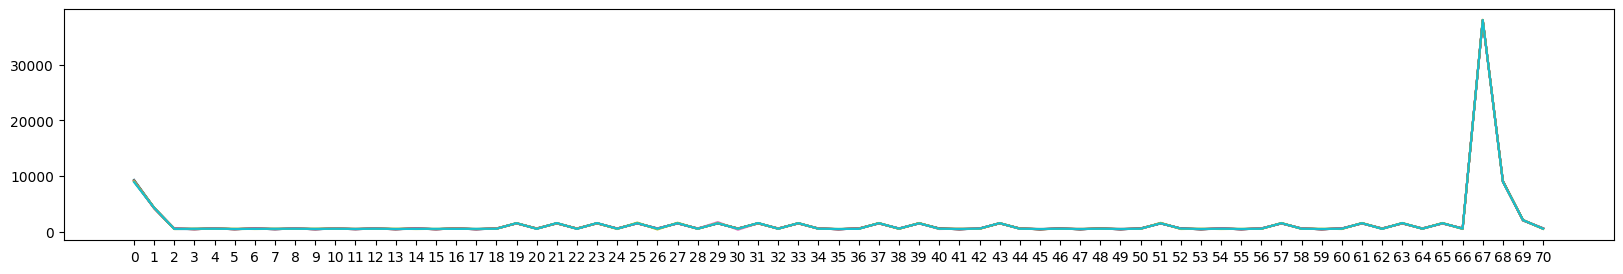

In [ ]:
import matplotlib.pyplot as plt
def plot(datos):
  plt.rcParams['figure.figsize'] = [20, 3]
  x_val=list(range(len(datos[0])))
  fig, ax = plt.subplots()
  for dato in datos:
      ax.plot(dato)
  plt.xticks(x_val)
  plt.show()

plot(dat1)

Plot only interested data


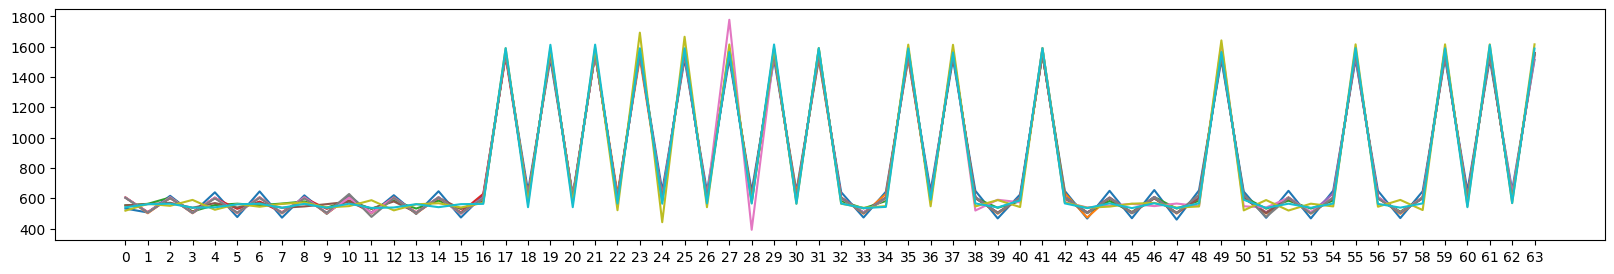

In [ ]:
plot([dato[2:66] for dato in dat1])

From the index 2 to the index 66 retrieve only the odd values , because the have the bit information  

# **Paso 7**
# **Ejercicio con el Numero 7 del Control Remoto**
Se realiza la graficacion de las 10 listas

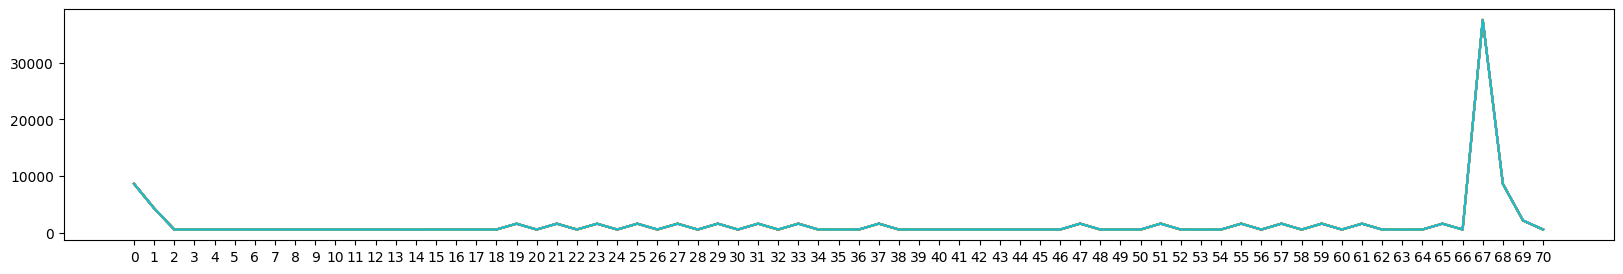

In [ ]:
import matplotlib.pyplot as plt
def plot(datos):
  plt.rcParams['figure.figsize'] = [20, 3]
  x_val=list(range(len(datos[0])))
  fig, ax = plt.subplots()
  for dato in datos:
      ax.plot(dato)
  plt.xticks(x_val)
  plt.show()

plot(listas)

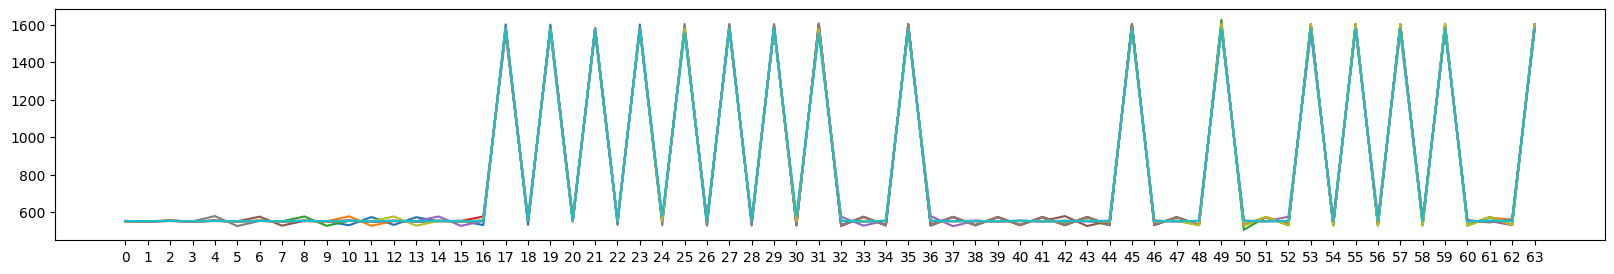

In [ ]:
plot([dato[2:66] for dato in listas])

In [ ]:
odds=[528.1, 519.8, 524.5, 519.0, 521.2, 517.5, 517.1, 514.1, 1559.2, 1560.0, 1564.1, 1571.2, 1568.4, 1583.6, 1563.6, 1558.4, 509.8, 1560.5, 1559.4, 523.3, 1567.4, 507.0, 515.4, 513.9, 1564.2, 515.4, 511.9, 1558.3, 512.6, 1562.8, 1562.7, 1556.4]
odds

[528.1,
 519.8,
 524.5,
 519.0,
 521.2,
 517.5,
 517.1,
 514.1,
 1559.2,
 1560.0,
 1564.1,
 1571.2,
 1568.4,
 1583.6,
 1563.6,
 1558.4,
 509.8,
 1560.5,
 1559.4,
 523.3,
 1567.4,
 507.0,
 515.4,
 513.9,
 1564.2,
 515.4,
 511.9,
 1558.3,
 512.6,
 1562.8,
 1562.7,
 1556.4]

In [ ]:
len(odds)

32

# **Paso 8**
# **Ejercicio con el Numero 7 del Control Remoto**
Se selecciona un intervalo entre cada una de las listas de la lista y a partir de el seleccionamos los valores impares, luego de ello se realiza un promedio de acuerdo a cada una de las emisiones realizadas para cada uno de los valores impares.

In [ ]:
import numpy as np

# Paso 1: tomar todas las sublistas recortadas y solo posiciones impares
todas_impares = []

for sub in listas:
    recorte = sub[2:66]
    impares = [valor for i, valor in enumerate(recorte) if i % 2 != 0]
    todas_impares.append(impares)

# Convertir a array para operar por columnas
arr = np.array(todas_impares)

# Paso 2: promedio por cada posición impar
promedios_por_pos = arr.mean(axis=0)
print("Tamaño de cada sublista impar:", arr.shape[1])
print("Promedio por cada valor impar:")
print(promedios_por_pos)

Tamaño de cada sublista impar: 32
Promedio por cada valor impar:
[ 551.1  550.7  548.2  548.5  548.8  550.8  551.   549.1 1578.6 1578.8
 1576.7 1581.4 1579.6 1584.3 1584.1 1585.9  558.2 1588.4  558.3  560.
  560.2  558.3 1590.6  560.6 1595.   564.5 1590.1 1592.8 1590.1 1588.
  559.7 1587. ]


Finally the code for key 0 is obtained; in binary, decimal and hexadecimal.

In [ ]:
binario=[('1' if odds[i] > 1000 else '0')  for i in range(32) ]
binario=''.join(binario)
binario

'00000000111111110110100010010111'

In [ ]:
cod=[int(binario[i*8 : (i+1)*8],2)  for i in range(4)]
cod

[0, 255, 104, 151]

In [ ]:
[hex(val) for val in cod]

['0x0', '0xff', '0x68', '0x97']

# **Paso 9**
# **Ejercicio con el Numero 7 del Control Remoto**
Se hace la transformacion entendiendo la grafica anterior, que para valores mayores a 1000 se obtiene un '1' Logico y por debajo un '0' Logico en las distintas bases numericas


In [ ]:
# Base Binaria
binario=[('1' if promedios_por_pos[i] > 1000 else '0')  for i in range(32) ]
binario=''.join(binario)
print("Esta es la representacion en binario",binario)

#Base Decimal
cod=[int(binario[i*8 : (i+1)*8],2)  for i in range(4)]
print("Esta es la representacion en decimal",cod)
#Base Hexadecimal
print("Esta es la representacion en Hexadecimal",[hex(val) for val in cod])

Esta es la representacion en binario 00000000111111110100001010111101
Esta es la representacion en decimal [0, 255, 66, 189]
Esta es la representacion en ['0x0', '0xff', '0x42', '0xbd']


>StWo code: Obtain the code for the key that the teacher say in class

>Challenge 1: Write a code in Raspberry Pico that print the digit that is received

>Challenge 2: Create a circuit with a button for  each digit and a IR LED. Also create a Script that when a button is pressed, it sends the respective code  by the IR LED. It must be received by another Raspberry Pico